In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
import boto3

In [3]:
df21 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/property.csv')
df21.head()

,property_id,host_id,neighborhood_id,price_id,availability_id,amenity_id,listing_name,listing_description,property_type,bedrooms,bathrooms,accommodates,beds,bed_type,room_type,minimum_nights,maximum_nights,extra_people_cost
0,16228948,54345288,1,1,1,1,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,House,5.0,7.0,10,5.0,Real Bed,Entire home/apt,1,1125,0.0
1,8909380,44800067,2,2,2,2,Nice quiet private ranch house,Very private and quite . Hiking horse riding a...,House,1.0,1.0,2,1.0,Real Bed,Private room,1,1125,0.0
2,14078522,84615808,3,3,3,3,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,House,1.0,1.0,2,1.0,Real Bed,Private room,1,1125,10.0
3,13006928,71743973,4,4,4,4,Miller Ranch Bunkhouse,"Our place is close to great views, equestrian ...",Other,1.0,1.0,6,3.0,Real Bed,Entire home/apt,1,2,0.0
4,7898757,41646908,5,5,5,5,Studio with full bathroom,Fully furnished studio only a 10 min drive fro...,Apartment,1.0,1.0,1,1.0,Real Bed,Private room,1,90,10.0


In [4]:
df21.drop(df21.columns.difference(['neighborhood_id','property_id','host_id','price_id','amenity_id','listing_description', 'availability_id','property_type','room_type','bedrooms','bathrooms','accommodates','beds','minimum_nights', 'maximum_nights']), 1, inplace=True)
# pd.set_option('display.max_columns', None)  
df21.head()

,property_id,host_id,neighborhood_id,price_id,availability_id,amenity_id,listing_description,property_type,bedrooms,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights
0,16228948,54345288,1,1,1,1,Stunning Ranch Estate situated on 20 acres and...,House,5.0,7.0,10,5.0,Entire home/apt,1,1125
1,8909380,44800067,2,2,2,2,Very private and quite . Hiking horse riding a...,House,1.0,1.0,2,1.0,Private room,1,1125
2,14078522,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,House,1.0,1.0,2,1.0,Private room,1,1125
3,13006928,71743973,4,4,4,4,"Our place is close to great views, equestrian ...",Other,1.0,1.0,6,3.0,Entire home/apt,1,2
4,7898757,41646908,5,5,5,5,Fully furnished studio only a 10 min drive fro...,Apartment,1.0,1.0,1,1.0,Private room,1,90


In [5]:
df22 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/neighborhood.csv')
df22.head()

,neighborhood_id,latitude,longitude,neighbourhood,city,state,zipcode,access,transit
0,1,34.530350,-118.227088,Acton,Acton,CA,93510,NaN,NaN
1,2,34.485431,-118.125380,Acton,Palmdale,CA,93550,Whole house,The train station is only one mile away
2,3,34.510130,-118.212407,Acton,Acton,CA,93510,Private Bath. Access to kitchen and refrigerat...,Just 4 miles from Metro commuter Train station
3,4,34.515486,-118.230742,Acton,Acton,CA,93510,We live on 5 acres and Our Bunkhouse is a sepa...,NaN
4,5,34.031419,-118.299016,Adams-Normandie,Los Angeles,CA,90007,NaN,NaN


In [6]:
df22.drop(df22.columns.difference(['neighborhood_id','neighbourhood','latitude', 'longitude', 'neighbourhood','zipcode']), 1, inplace=True)
df22

,neighborhood_id,latitude,longitude,neighbourhood,zipcode
0,1,34.530350,-118.227088,Acton,93510
1,2,34.485431,-118.125380,Acton,93550
2,3,34.510130,-118.212407,Acton,93510
3,4,34.515486,-118.230742,Acton,93510
4,5,34.031419,-118.299016,Adams-Normandie,90007
...,...,...,...,...,...
31248,31249,33.930022,-117.974940,Whittier,90631
31249,31250,34.037906,-118.654012,Malibu,90265
31250,31251,34.036676,-118.650505,Malibu,90265
31251,31252,33.944261,-117.927134,La Habra Heights,90631


In [7]:
df23 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/review.csv')
df23.head()

,review_id,property_id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments
0,1,14078522,14,100.0,10.0,10.0,10.0,10.0,10.0,"My wife, son and I stayed for 1 day and it fel..."
1,2,14078522,14,100.0,10.0,10.0,10.0,10.0,10.0,We loved staying with Kirsten! She gave us all...
2,3,14078522,14,100.0,10.0,10.0,10.0,10.0,10.0,This was an amazing Airbnb experience. The mos...
3,4,14078522,14,100.0,10.0,10.0,10.0,10.0,10.0,Always a pleasure!!
4,5,14078522,14,100.0,10.0,10.0,10.0,10.0,10.0,This is the ultimate pet adventure! Lots of o...


In [8]:
df23.drop(df23.columns.difference(['property_id','comments','number_of_reviews', 'review_scores_rating']), 1, inplace=True)
df23

,property_id,number_of_reviews,review_scores_rating,comments
0,14078522,14,100.0,"My wife, son and I stayed for 1 day and it fel..."
1,14078522,14,100.0,We loved staying with Kirsten! She gave us all...
2,14078522,14,100.0,This was an amazing Airbnb experience. The mos...
3,14078522,14,100.0,Always a pleasure!!
4,14078522,14,100.0,This is the ultimate pet adventure! Lots of o...
...,...,...,...,...
719330,1312336,152,91.0,Marinella is a great host. Her children and do...
719331,1312336,152,91.0,"Great place, easy to check in with no hassles."
719332,1312336,152,91.0,"Great, convenient location. Very friendly host."
719333,1312336,152,91.0,Love this place. Will stay at this location ne...


In [9]:
df111=pd.merge(df21,df22,on='neighborhood_id',how='inner')
df111

,property_id,host_id,neighborhood_id,price_id,availability_id,amenity_id,listing_description,property_type,bedrooms,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,16228948,54345288,1,1,1,1,Stunning Ranch Estate situated on 20 acres and...,House,5.0,7.0,10,5.0,Entire home/apt,1,1125,34.530350,-118.227088,Acton,93510
1,8909380,44800067,2,2,2,2,Very private and quite . Hiking horse riding a...,House,1.0,1.0,2,1.0,Private room,1,1125,34.485431,-118.125380,Acton,93550
2,14078522,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,House,1.0,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,13006928,71743973,4,4,4,4,"Our place is close to great views, equestrian ...",Other,1.0,1.0,6,3.0,Entire home/apt,1,2,34.515486,-118.230742,Acton,93510
4,7898757,41646908,5,5,5,5,Fully furnished studio only a 10 min drive fro...,Apartment,1.0,1.0,1,1.0,Private room,1,90,34.031419,-118.299016,Adams-Normandie,90007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31248,18445825,107958524,31249,31249,31249,31249,Our bedroom features a california King bed wit...,House,1.0,1.0,2,1.0,Private room,1,7,33.930022,-117.974940,Whittier,90631
31249,18192212,850039,31250,31250,31250,31250,This newly renovated luxury apartment is great...,Apartment,1.0,1.0,2,1.0,Private room,2,7,34.037906,-118.654012,Malibu,90265
31250,17339165,117101757,31251,31251,31251,31251,*PLEASE do not book before you contact me! All...,Villa,5.0,5.0,10,5.0,Entire home/apt,5,1125,34.036676,-118.650505,Malibu,90265
31251,17827299,121899402,31252,31252,31252,31252,Two Separate Bedroom comfortably fits 4 Adjac...,House,2.0,1.0,4,2.0,Private room,2,100,33.944261,-117.927134,La Habra Heights,90631


In [10]:
df112=pd.merge(df23,df111,on='property_id',how='inner')
df112

,property_id,number_of_reviews,review_scores_rating,comments,host_id,neighborhood_id,price_id,availability_id,amenity_id,listing_description,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,14078522,14,100.0,"My wife, son and I stayed for 1 day and it fel...",84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,14078522,14,100.0,We loved staying with Kirsten! She gave us all...,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,14078522,14,100.0,This was an amazing Airbnb experience. The mos...,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,14078522,14,100.0,Always a pleasure!!,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,14078522,14,100.0,This is the ultimate pet adventure! Lots of o...,84615808,3,3,3,3,My place is close to Six Flags Magic Mountain ...,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719330,1312336,152,91.0,Marinella is a great host. Her children and do...,7131227,31240,31240,31240,31240,Detached Guest House The Guest House provides...,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719331,1312336,152,91.0,"Great place, easy to check in with no hassles.",7131227,31240,31240,31240,31240,Detached Guest House The Guest House provides...,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719332,1312336,152,91.0,"Great, convenient location. Very friendly host.",7131227,31240,31240,31240,31240,Detached Guest House The Guest House provides...,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719333,1312336,152,91.0,Love this place. Will stay at this location ne...,7131227,31240,31240,31240,31240,Detached Guest House The Guest House provides...,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367


In [11]:
df41 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/host.csv')
df41.head()

,host_id,host_url,host_name,host_since,host_is_superhost,host_response_time,host_acceptance_rate
0,54345288,https://www.airbnb.com/users/show/54345288,Robert,2016-01-12,0.0,a few days or more,NaN
1,44800067,https://www.airbnb.com/users/show/44800067,Kevin,2015-09-22,1.0,within an hour,NaN
2,84615808,https://www.airbnb.com/users/show/84615808,Kirsten,2016-07-19,1.0,within an hour,NaN
3,71743973,https://www.airbnb.com/users/show/71743973,Beverly,2016-05-12,1.0,within an hour,NaN
4,41646908,https://www.airbnb.com/users/show/41646908,Ian,2015-08-16,0.0,NaN,NaN


In [12]:
df41.drop(df41.columns.difference(['host_id','host_since', 'host_is_superhost','host_response_time']), 1, inplace=True)
df41

,host_id,host_since,host_is_superhost,host_response_time
0,54345288,2016-01-12,0.0,a few days or more
1,44800067,2015-09-22,1.0,within an hour
2,84615808,2016-07-19,1.0,within an hour
3,71743973,2016-05-12,1.0,within an hour
4,41646908,2015-08-16,0.0,NaN
...,...,...,...,...
20805,107958524,2016-12-20,0.0,within an hour
20806,850039,2011-07-21,1.0,within an hour
20807,117101757,2017-02-19,0.0,within a day
20808,121899402,2017-03-21,0.0,within an hour


In [13]:
df113=pd.merge(df41,df112,on='host_id',how='inner')
df113

,host_id,host_since,host_is_superhost,host_response_time,property_id,number_of_reviews,review_scores_rating,comments,neighborhood_id,price_id,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,84615808,2016-07-19,1.0,within an hour,14078522,14,100.0,"My wife, son and I stayed for 1 day and it fel...",3,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,84615808,2016-07-19,1.0,within an hour,14078522,14,100.0,We loved staying with Kirsten! She gave us all...,3,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,84615808,2016-07-19,1.0,within an hour,14078522,14,100.0,This was an amazing Airbnb experience. The mos...,3,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,84615808,2016-07-19,1.0,within an hour,14078522,14,100.0,Always a pleasure!!,3,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,84615808,2016-07-19,1.0,within an hour,14078522,14,100.0,This is the ultimate pet adventure! Lots of o...,3,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719330,7131227,2013-06-26,0.0,within a day,1312336,152,91.0,Marinella is a great host. Her children and do...,31240,31240,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719331,7131227,2013-06-26,0.0,within a day,1312336,152,91.0,"Great place, easy to check in with no hassles.",31240,31240,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719332,7131227,2013-06-26,0.0,within a day,1312336,152,91.0,"Great, convenient location. Very friendly host.",31240,31240,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719333,7131227,2013-06-26,0.0,within a day,1312336,152,91.0,Love this place. Will stay at this location ne...,31240,31240,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367


In [14]:
df51 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/amenity.csv')
df51.head()

,amenity_id,wireless_Internet,air_conditioning,pool,self_check_in,private_entrance,breakfast,free_parking_on_premises,tv,gym,...,iron,shampoo,hair_dryer,high_chair,crib,carbon_monoxide_detector,smoke_detector,babysitter_recommendations,pets_allowed,first_aid_kit
0,1,1,1,1,0,0,0,1,0,1,...,1,1,1,0,0,1,1,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,1,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
4,5,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
df114=pd.merge(df51,df113,on='amenity_id',how='inner')
df114

,amenity_id,wireless_Internet,air_conditioning,pool,self_check_in,private_entrance,breakfast,free_parking_on_premises,tv,gym,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,3,1,1,0,0,0,0,1,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,3,1,1,0,0,0,0,1,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,3,1,1,0,0,0,0,1,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,3,1,1,0,0,0,0,1,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,3,1,1,0,0,0,0,1,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719330,31240,1,1,0,0,0,0,0,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719331,31240,1,1,0,0,0,0,0,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719332,31240,1,1,0,0,0,0,0,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719333,31240,1,1,0,0,0,0,0,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367


In [16]:
df61 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/availability.csv')
df61.head()

,availability_id,availability_30,availability_60,availability_90,availability_365
0,1,27,53,82,352
1,2,29,45,75,350
2,3,18,43,73,348
3,4,3,17,30,87
4,5,0,0,0,0


In [17]:
df61.drop(df61.columns.difference(['availability_id','availability_30','availability_60','availability_90']), 1, inplace=True)
df61

,availability_id,availability_30,availability_60,availability_90
0,1,27,53,82
1,2,29,45,75
2,3,18,43,73
3,4,3,17,30
4,5,0,0,0
...,...,...,...,...
31248,31249,29,59,89
31249,31250,29,59,89
31250,31251,29,59,89
31251,31252,28,51,81


In [18]:
df115=pd.merge(df61,df114,on='availability_id',how='inner')
df115

,availability_id,availability_30,availability_60,availability_90,amenity_id,wireless_Internet,air_conditioning,pool,self_check_in,private_entrance,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,3,18,43,73,3,1,1,0,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,3,18,43,73,3,1,1,0,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,3,18,43,73,3,1,1,0,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,3,18,43,73,3,1,1,0,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,3,18,43,73,3,1,1,0,0,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719330,31240,5,19,43,31240,1,1,0,0,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719331,31240,5,19,43,31240,1,1,0,0,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719332,31240,5,19,43,31240,1,1,0,0,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719333,31240,5,19,43,31240,1,1,0,0,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367


In [19]:
df71 = pd.read_csv('https://data-analytics-airbnb.s3.us-east-2.amazonaws.com/Data/price.csv')
df71.head()

,price_id,daily_price,weekly_price,monthly_price,cleaning_fee,security_deposit
0,1,3000.0,NaN,NaN,200.0,2000.0
1,2,50.0,NaN,NaN,NaN,NaN
2,3,55.0,NaN,NaN,NaN,NaN
3,4,150.0,NaN,NaN,35.0,NaN
4,5,30.0,NaN,NaN,5.0,NaN


In [20]:
df71.drop(df71.columns.difference(['price_id','daily_price', 'weekly_price','cleaning_fee','security_deposit']), 1, inplace=True)
df71

,price_id,daily_price,weekly_price,cleaning_fee,security_deposit
0,1,3000.0,NaN,200.0,2000.0
1,2,50.0,NaN,NaN,NaN
2,3,55.0,NaN,NaN,NaN
3,4,150.0,NaN,35.0,NaN
4,5,30.0,NaN,5.0,NaN
...,...,...,...,...,...
31248,31249,75.0,NaN,15.0,NaN
31249,31250,205.0,NaN,NaN,NaN
31250,31251,500.0,NaN,NaN,1000.0
31251,31252,65.0,NaN,NaN,NaN


In [21]:
df116=pd.merge(df71,df115,on='price_id',how='inner')
df116.head(50)

,price_id,daily_price,weekly_price,cleaning_fee,security_deposit,availability_id,availability_30,availability_60,availability_90,amenity_id,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
5,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
6,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
7,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
8,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
9,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510


In [22]:
df116.isna().sum()

price_id                           0
daily_price                        0
weekly_price                  470773
cleaning_fee                  105962
security_deposit              280935
availability_id                    0
availability_30                    0
availability_60                    0
availability_90                    0
amenity_id                         0
wireless_Internet                  0
air_conditioning                   0
pool                               0
self_check_in                      0
private_entrance                   0
breakfast                          0
free_parking_on_premises           0
tv                                 0
gym                                0
hot_tub                            0
indoor_fireplace                   0
heating                            0
family_kid_friendly                0
washer                             0
dryer                              0
hangers                            0
iron                               0
s

In [24]:
merged_airbnb=pd.DataFrame(df116)
merged_airbnb.to_csv('merged_data.csv', index=False)

In [25]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df116.shape))

The dataset has 719335 rows and 58 columns.


In [26]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(df116.groupby('host_id')['property_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['property_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,property_id
host_id,
3392276,32
1497543,20
25551648,19
57161,18
1466173,18
9250479,15
40225166,14
3843940,12
4981837,11


In [27]:
top20_hosts = properties_per_host.head(20)

In [28]:
# extracting the host id's and placing them into a list
# it's also possible here to create an empty list and store the listing_id's if desired
top20_list = []
# top20_listings = []
for index, row in top20_hosts.iterrows():
    top20_list.append(index)
#     top20_listings.append(row[i])
    
top20_list

[3392276,
 1497543,
 25551648,
 57161,
 1466173,
 9250479,
 40225166,
 3843940,
 4981837,
 16672866,
 2324191,
 2622454,
 47734626,
 8206200,
 21940642,
 25147343,
 6277851,
 76615761,
 1763193,
 21458609]

In [29]:
# using the created list of host ids, iterating through and creating a data frame for each id
# to variably create and store these dataframes, creating empty lists and appending them as the 
# list values are iterated through
neighbourhoods = []
properties = []
for value in top20_list:
    df116[df116.host_id==value].neighbourhood.value_counts()
    neighbourhoods.append(pd.DataFrame(df116[df116.host_id==value].groupby('neighbourhood')['property_id'].nunique()))
    properties.append(pd.DataFrame(df116[df116.host_id==value].groupby('property_type')['property_id'].nunique()))

In [30]:
# the dataframes are now callable as such
neighbourhoods[0]
# which is essentially the same as if we had run
# pd.DataFrame(df[df.host_id==48005494].groupby('neighbourhood_group')['listing_id'].nunique())
# properties[0]
# which is essentially the same as if we had run
# pd.DataFrame(df[df.host_id==48005494].groupby('property_type')['listing_id'].nunique())

,property_id
neighbourhood,
Brentwood,1
Pacific Palisades,3
West Los Angeles,24
Westwood,4


In [31]:
properties[0]

,property_id
property_type,
Apartment,29
House,3


In [ ]:
top1_host = df.host_id == 3392276
df[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

In [ ]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

In [ ]:
top2_host = df.host_id == 25551648
df[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())

In [ ]:
pd.DataFrame(df[top2_host].groupby('property_type')['listing_id'].nunique())

In [ ]:
top3_host = df.host_id == 31102550
df[top3_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood_group')['listing_id'].nunique())

In [ ]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

In [ ]:
top4_host = df.host_id == 31102550
df[top4_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top4_host].groupby('neighbourhood_group')['listing_id'].nunique())

In [ ]:
pd.DataFrame(df[top4_host].groupby('property_type')['listing_id'].nunique())

In [ ]:
top5_host = df.host_id == 3843940
df[top5_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top5_host].groupby('neighbourhood_group')['listing_id'].nunique())

In [ ]:
pd.DataFrame(df[top5_host].groupby('property_type')['listing_id'].nunique())

In [32]:
df116.isna().sum()

price_id                           0
daily_price                        0
weekly_price                  470773
cleaning_fee                  105962
security_deposit              280935
availability_id                    0
availability_30                    0
availability_60                    0
availability_90                    0
amenity_id                         0
wireless_Internet                  0
air_conditioning                   0
pool                               0
self_check_in                      0
private_entrance                   0
breakfast                          0
free_parking_on_premises           0
tv                                 0
gym                                0
hot_tub                            0
indoor_fireplace                   0
heating                            0
family_kid_friendly                0
washer                             0
dryer                              0
hangers                            0
iron                               0
s

In [33]:
df116.dropna(inplace=True)
df116.isna().sum()

price_id                      0
daily_price                   0
weekly_price                  0
cleaning_fee                  0
security_deposit              0
availability_id               0
availability_30               0
availability_60               0
availability_90               0
amenity_id                    0
wireless_Internet             0
air_conditioning              0
pool                          0
self_check_in                 0
private_entrance              0
breakfast                     0
free_parking_on_premises      0
tv                            0
gym                           0
hot_tub                       0
indoor_fireplace              0
heating                       0
family_kid_friendly           0
washer                        0
dryer                         0
hangers                       0
iron                          0
shampoo                       0
hair_dryer                    0
high_chair                    0
crib                          0
carbon_m

In [35]:
df116.shape

(146795, 58)

In [ ]:
# !pip install langdetect

In [36]:
# we use Python's langdetect 
from langdetect import detect

In [37]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [38]:
%%time
df116['language'] = df116['comments'].apply(language_detection)

Wall time: 14min 40s


In [39]:
df116.language.value_counts().head(10)

en       138265
fr         1986
de         1182
zh-cn      1132
es          984
ko          628
ro          308
it          285
pt          263
ja          230
Name: language, dtype: int64

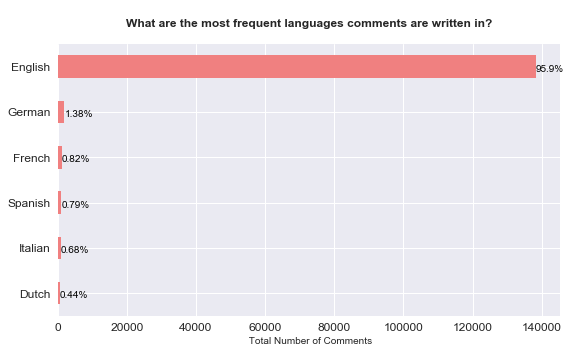

In [40]:
# visualizing the comments' languages 
ax = df116.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [43]:
# splitting the dataframes in language related sub-dataframes
df_eng = df116[(df116['language']=='en')]
df_de  = df116[(df116['language']=='de')]
df_fr  = df116[(df116['language']=='fr')]

In [44]:
df_eng=pd.DataFrame(df_eng)
df_eng.to_csv('data/df_eng.csv', index=False)

In [ ]:
# !pip install WordCloud

In [ ]:
# !pip install stopwords

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Home
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [47]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

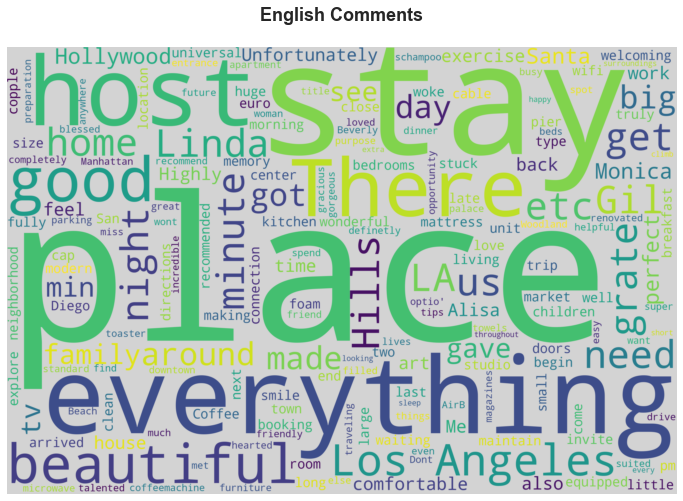

In [48]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

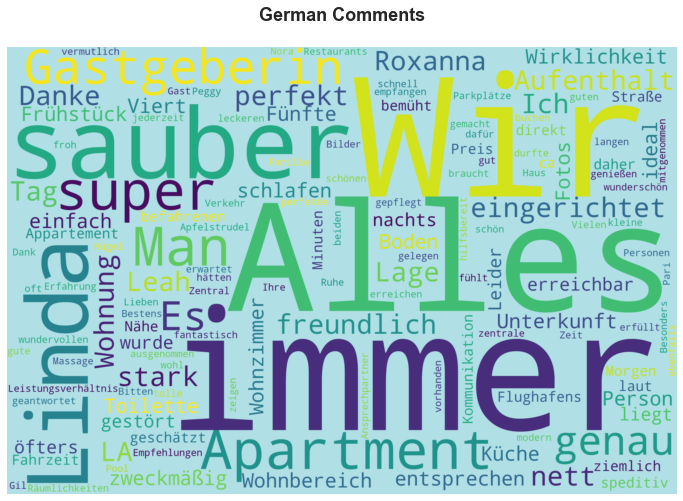

In [49]:
wordcloud = WordCloud(max_font_size=None, max_words=150, background_color="powderblue",
                      width=3000, height=2000,
                      stopwords=stopwords.words('german')).generate(str(df_de.comments.values))

plot_wordcloud(wordcloud, 'German')

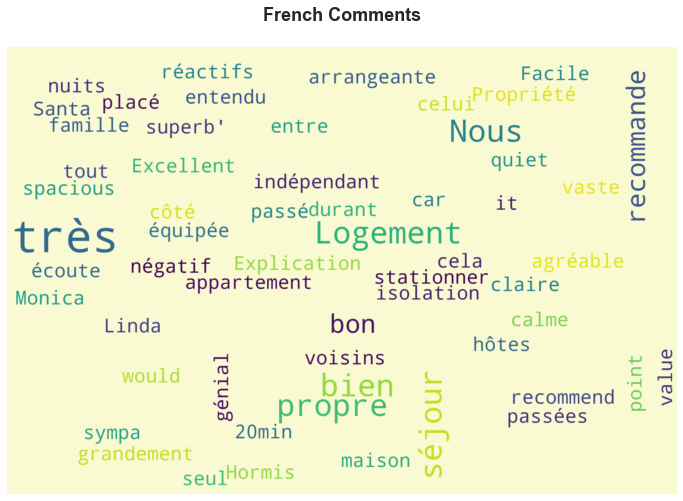

In [50]:
wordcloud = WordCloud(max_font_size=200, max_words=150, background_color="lightgoldenrodyellow",
                      #width=1600, height=800,
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df_fr.comments.values))

plot_wordcloud(wordcloud, 'French')

In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Home
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [53]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [54]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [55]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [58]:
negative_score("Airbnb rolled out a new tool that encourages guests to send kindness cards and cash donations to their former hosts impacted by COVID-19.")

0.0

In [59]:
neutral_score("Airbnb rolled out a new tool that encourages guests to send kindness cards and cash donations to their former hosts impacted by COVID-19.")

0.772

In [60]:
positive_score("Airbnb rolled out a new tool that encourages guests to send kindness cards and cash donations to their former hosts impacted by COVID-19.")

0.228

In [61]:
compound_score("Airbnb rolled out a new tool that encourages guests to send kindness cards and cash donations to their former hosts impacted by COVID-19.")

0.7096

In [62]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

Wall time: 7min 38s


In [63]:
df = df_eng

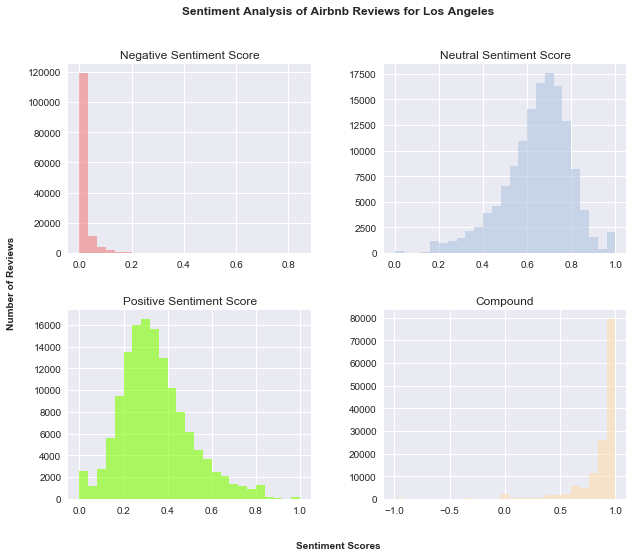

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Los Angeles\n\n', fontsize=12, fontweight='bold');

In [65]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    138265.000000
mean          0.856645
std           0.229751
min          -0.996700
5%            0.457600
10%           0.636900
20%           0.809900
30%           0.875000
40%           0.912900
50%           0.936600
60%           0.953100
70%           0.966100
80%           0.976400
90%           0.985600
max           0.999700
Name: sentiment_compound, dtype: float64

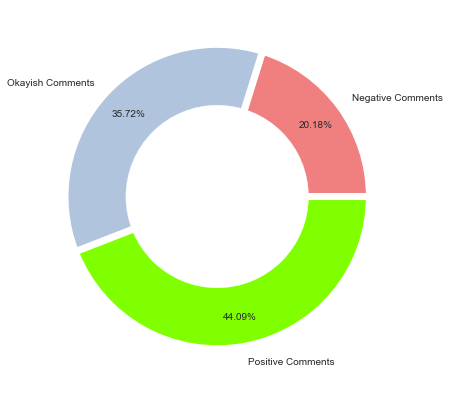

In [66]:
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [67]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [68]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [69]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

In [70]:
pos_comments[10:15]

['The place was lovely, super clean, and had everything we could possibly need. Gil and Linda were also very helpful in getting us settled in! I would definitely recommend this place to stay!',
 'The apartment was beautiful, spacious, and in a great location! Linda and Gil were attentive and very understanding, and we really enjoyed our stay. Had a great time!',
 'Great host with clear communication. I felt like I was in a chic european apartment. Everything in the place was brand new and Linda was very welcoming. We had a conference at USC so the location was perfect for us. Would definitely stay again. ',
 'I love meeting hosts like Linda and Gil.  They put a lot of love into their rental… and it definitely shows! Gil did an amazing job building and furnishing the apartment with his modern metalworks.  Everything was so comfortable and immaculately clean.  Linda made us feel instantly at home, and gave us some great dog-walking suggestions.  We even found the mansion used in the TV s

In [71]:
neg_comments[10:15]

['The worst experience ever! This was my first time to use Airbnb. Unfortunately it was not a good experience and I will not use Airbnb again. The room which we stayed was absolutely disgusting . The bedsheets looked like it hadnt been washed and there were food stains and hair everywhere.  Also one of the light bulb was broken. When I sat on the bed it seemed like it was about to break. The bathroom was also unacceptable . The shower and bath was covered in grime and there was pubic hair in the bath and walls. That three night stayed there makes my trip really miserable. ',
 'My experience was nothing like I had imagined or hoped it would be by reading Rebekahs reviews and looking at pictures. I showed up and I was completely mortified. Turns out that the location of the house wasnt in the best neighborhood, the cleanliness of her home is appalling, the photos do not look anything like the real thing.. I wore my flip flops in the shower. The fan on the roof of my room literally was gr

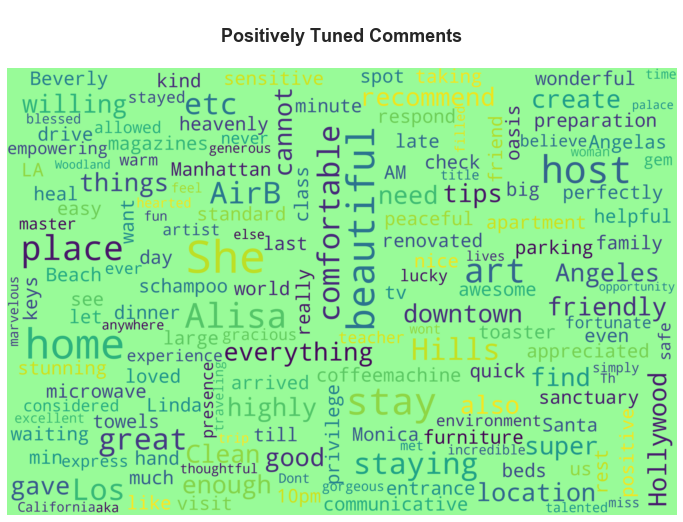

In [72]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [ ]:
# !pip install yellowbrick

In [73]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

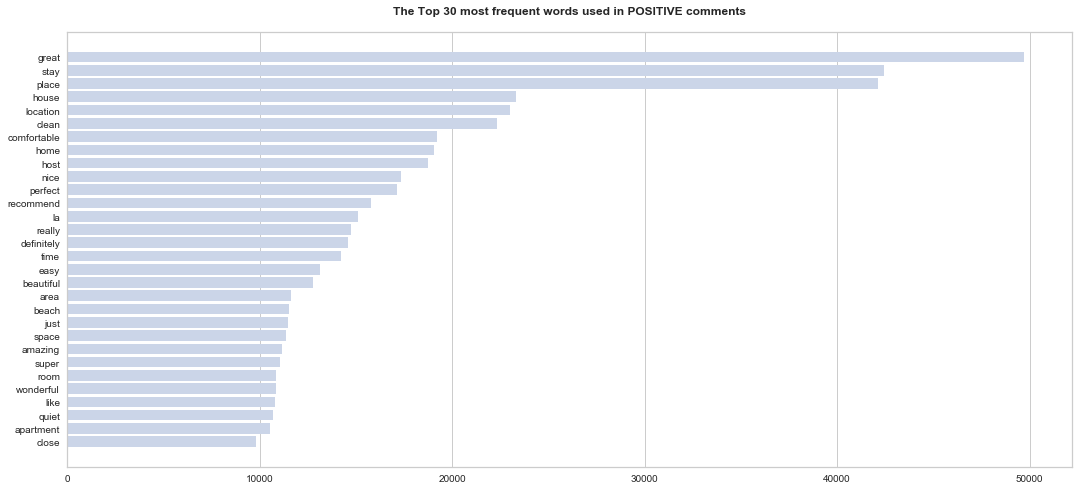

In [74]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

## Topic Modelling

In [81]:
# stuff we'll need for text processing
from nltk.corpus import stopwords
import re as re
from pyspark.ml.feature import CountVectorizer , IDF
# stuff we'll need for building the model
from pyspark.mllib.linalg import Vector, Vectors
from pyspark.mllib.clustering import LDA, LDAModel

In [89]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [90]:
# prepare the preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [91]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Home
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [93]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')

In [ ]:
# !pip install gensim

In [94]:
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"home" + 0.018*"stay" + 0.016*"place" + 0.014*"host"')
(1, '0.009*"u" + 0.008*"house" + 0.008*"kitchen" + 0.008*"bed"')
(2, '0.042*"great" + 0.029*"place" + 0.027*"stay" + 0.022*"location"')


In [95]:
# let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.010*"room" + 0.010*"bed" + 0.010*"kitchen" + 0.009*"jenny"')
(1, '0.038*"great" + 0.024*"place" + 0.022*"stay" + 0.021*"beach"')
(2, '0.031*"stay" + 0.030*"place" + 0.027*"great" + 0.021*"host"')
(3, '0.023*"home" + 0.014*"house" + 0.012*"u" + 0.012*"beautiful"')
(4, '0.063*"u" + 0.021*"arrival" + 0.020*"coffee" + 0.018*"cathy"')


In [96]:
# let LDA find 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.028*"kitchen" + 0.027*"bed" + 0.019*"comfortable" + 0.017*"bathroom"')
(1, '0.048*"great" + 0.027*"place" + 0.026*"location" + 0.023*"easy"')
(2, '0.015*"place" + 0.009*"one" + 0.009*"get" + 0.009*"would"')
(3, '0.168*"beach" + 0.104*"venice" + 0.041*"monica" + 0.041*"bike"')
(4, '0.081*"u" + 0.017*"stay" + 0.017*"made" + 0.014*"even"')
(5, '0.026*"home" + 0.016*"place" + 0.016*"host" + 0.015*"experience"')
(6, '0.117*"los" + 0.106*"angeles" + 0.031*"silverlake" + 0.025*"cabin"')
(7, '0.157*"sarah" + 0.043*"cat" + 0.035*"derek" + 0.031*"flat"')
(8, '0.051*"great" + 0.043*"place" + 0.042*"stay" + 0.025*"clean"')
(9, '0.027*"house" + 0.014*"jenny" + 0.013*"home" + 0.011*"family"')


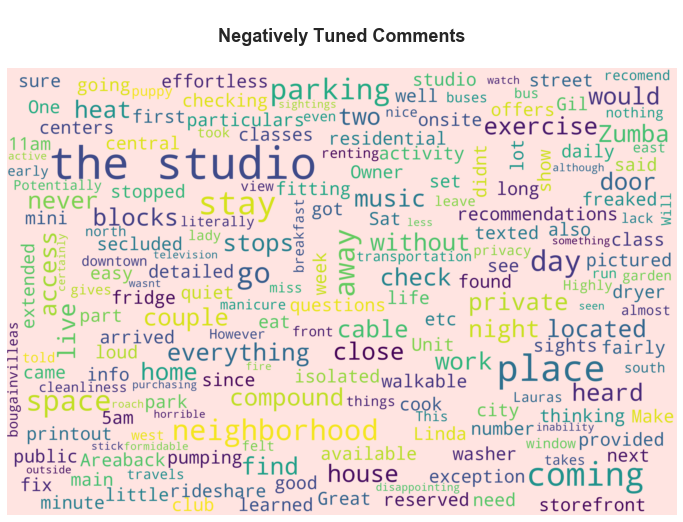

In [97]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

In [99]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

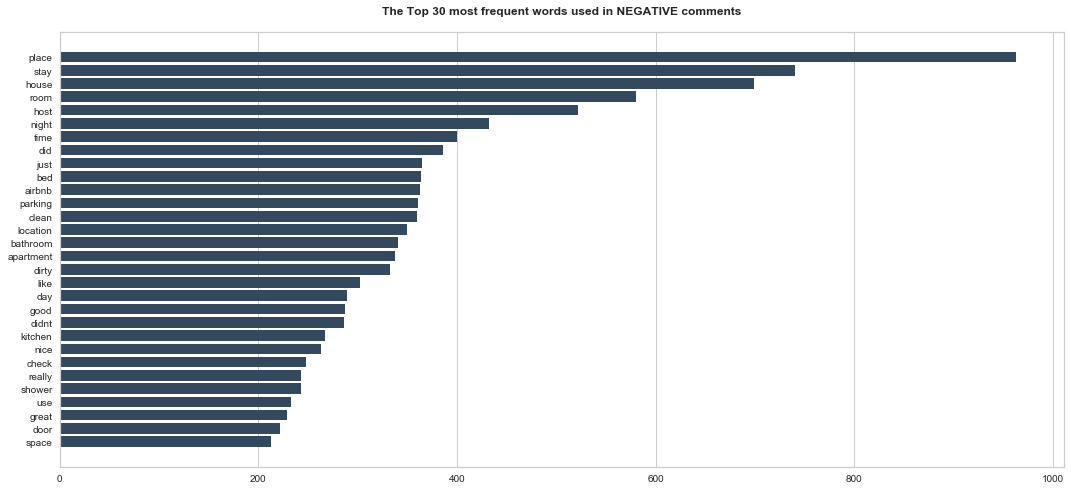

In [100]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [101]:
# calling the cleaning function we defined earlier
doc_clean = [clean(comment).split() for comment in neg_comments]

In [102]:
# create a dictionary from the normalized data, convert this to a bag-of-words corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

In [103]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"room" + 0.012*"place" + 0.009*"would" + 0.009*"bathroom"')
(1, '0.010*"place" + 0.010*"stay" + 0.008*"house" + 0.008*"host"')
(2, '0.013*"place" + 0.009*"stay" + 0.008*"house" + 0.008*"parking"')


In [104]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"room" + 0.011*"place" + 0.009*"stay" + 0.008*"house"')
(1, '0.013*"place" + 0.012*"house" + 0.012*"host" + 0.009*"stay"')
(2, '0.008*"time" + 0.007*"day" + 0.007*"stay" + 0.007*"u"')
(3, '0.015*"place" + 0.010*"stay" + 0.009*"would" + 0.008*"bed"')
(4, '0.010*"house" + 0.009*"place" + 0.008*"room" + 0.007*"bathroom"')


In [105]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model10_neg.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.010*"host" + 0.009*"stay" + 0.008*"night" + 0.008*"place"')
(1, '0.014*"place" + 0.011*"stay" + 0.007*"one" + 0.006*"also"')
(2, '0.017*"place" + 0.011*"room" + 0.008*"get" + 0.007*"host"')
(3, '0.012*"bed" + 0.011*"place" + 0.009*"night" + 0.008*"would"')
(4, '0.012*"house" + 0.011*"stay" + 0.010*"u" + 0.009*"time"')
(5, '0.015*"place" + 0.010*"house" + 0.010*"night" + 0.009*"location"')
(6, '0.018*"place" + 0.011*"house" + 0.011*"stay" + 0.009*"room"')
(7, '0.009*"host" + 0.008*"stay" + 0.008*"parking" + 0.008*"place"')
(8, '0.017*"room" + 0.008*"apartment" + 0.008*"place" + 0.007*"would"')
(9, '0.021*"house" + 0.014*"dirty" + 0.010*"place" + 0.010*"room"')
